In [71]:
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt
import scipy
import os
print(os.listdir())
plt.style.use('grayscale')
#Source:https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123

['.git', '.gitignore', '.gitmodules', '2_circles.py', 'Ausarbeitung', 'callibrate_circle_test.py', 'COMMANDS.md', 'coords.py', 'cv_example1.py', 'cv_tracking_test.py', 'images', 'LICENSE', 'lumax', 'lumax_demo.py', 'my_canny.ipynb', 'my_hough.ipynb', 'README.md', 'rectangle_detect.py', 'requirements.txt', 'tests', 'tracker.py', '__pycache__']


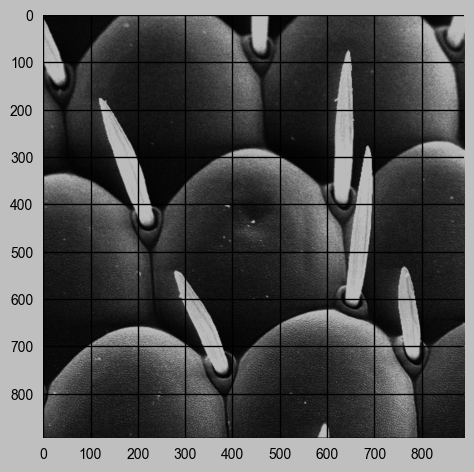

In [73]:
test_img=cv2.imread("images/drosophila_auge_detail.png")
plt.imshow(test_img)
plt.show()

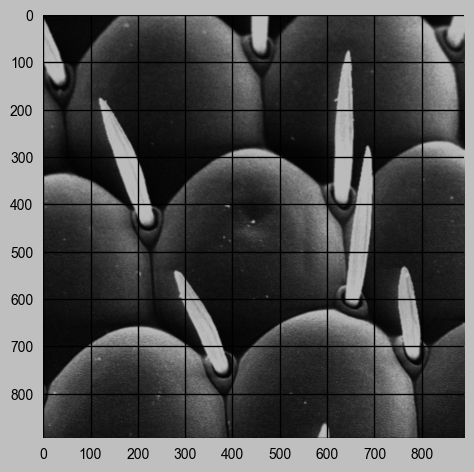

In [74]:
blur_img=cv2.GaussianBlur(test_img,(5,5),1)
plt.imshow(blur_img)
plt.show()

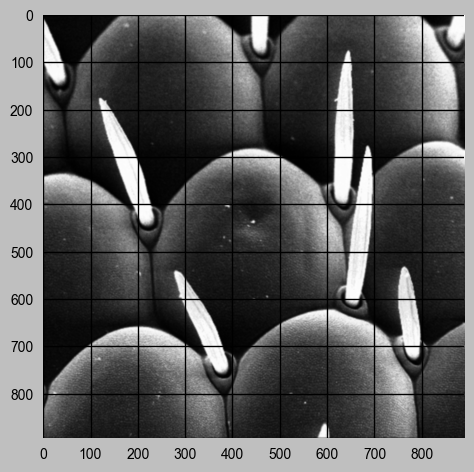

In [92]:
gray_img=cv2.cvtColor(blur_img, cv2.COLOR_BGR2GRAY)/255
plt.imshow(gray_img)

C:\Users\bjste\AppData\Local\Temp\ipykernel_1540\3198163739.py:3: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  Gx=scipy.ndimage.filters.convolve(gray_img,sobel_kernel_x)
C:\Users\bjste\AppData\Local\Temp\ipykernel_1540\3198163739.py:4: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  Gy=scipy.ndimage.filters.convolve(gray_img,sobel_kernel_y)


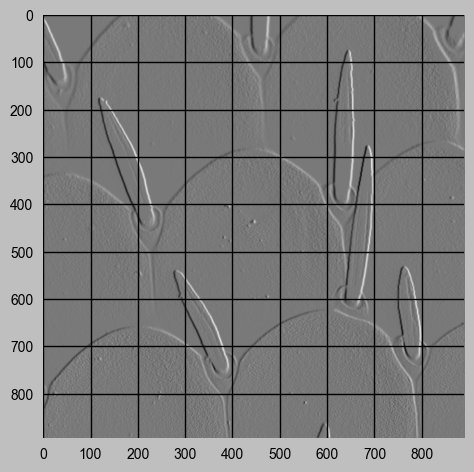

In [93]:
sobel_kernel_x=np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
sobel_kernel_y=np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
Gx=scipy.ndimage.filters.convolve(gray_img,sobel_kernel_x)
Gy=scipy.ndimage.filters.convolve(gray_img,sobel_kernel_y)
plt.imshow(Gx)

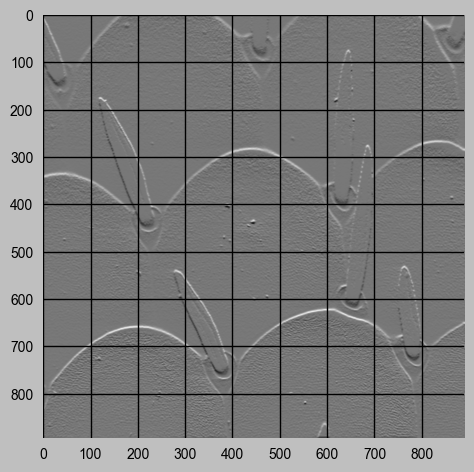

In [94]:
plt.imshow(Gy)

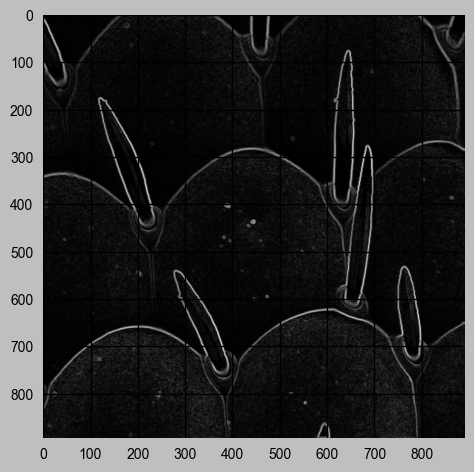

In [95]:
G=np.sqrt(Gx**2+Gy**2)
plt.imshow(G)

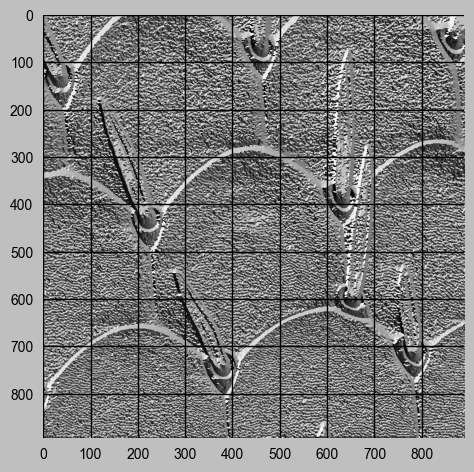

In [96]:
theta= np.arctan2(Gy, Gx)
plt.imshow(theta)

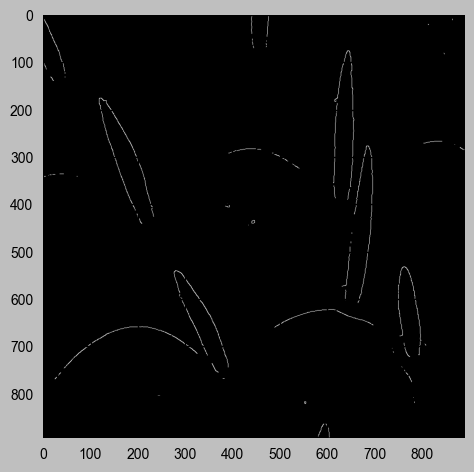

In [97]:
def nms(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z
nms_img=nms(G,theta)
plt.imshow(nms_img)

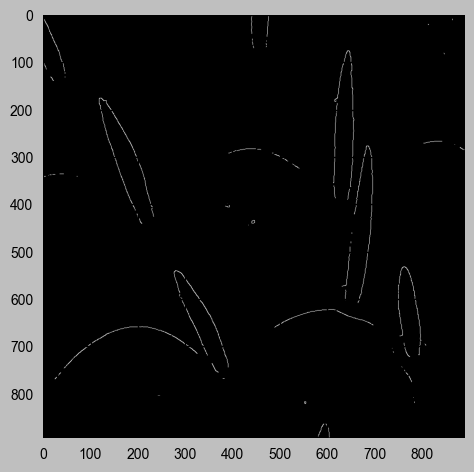

In [98]:
def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return (res, weak, strong)
thresh_img,low,high=threshold(nms_img)
plt.imshow(thresh_img)

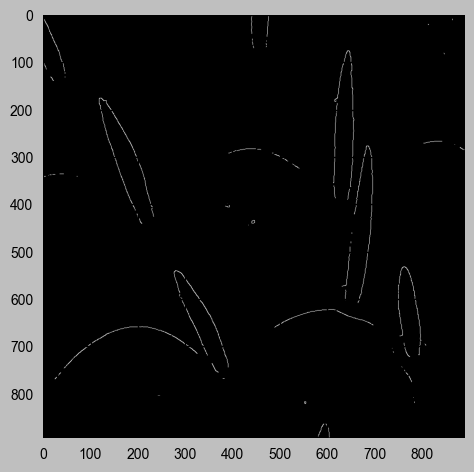

In [99]:
def hysteresis(img, weak, strong=255):
    M, N = img.shape  
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    return img
final_edges=hysteresis(thresh_img,low,high)
plt.imshow(final_edges)